This tutorial explains and demonstrates the use of Clustering_Functions.py to analyze an election and to cluster the ballots of an election.

In [1]:
from Clustering_Functions import csv_parse, party_abrevs, Summarize_election, Plot_ballot_lengths, Plot_clusters, \
     kmeans, kmedoids, Random_clusters, Clustering_closeness, Ballot_MDS_plot, Candidate_MDS_plot, Slate_cluster, \
     Group_candidates, Modularity_cluster, Mallows_election

First, we'll use the `csv_parse` function to load and parse the .csv file format in which Scottish election data is stored.

A large trove of election files is found here: https://github.com/mggg/scot-elex/tree/main

In [2]:
# The Pentland Hills election that's studied in the paper
filename = 'scot-elex/7_cands/edinburgh_2017_ward2.csv'
num_cands, election, cand_names, ward = csv_parse(filename)
parties = party_abrevs(cand_names)

In [3]:
print(ward, "\n")

for n in range(len(cand_names)):
    print(f"{n+1} = {cand_names[n]}")

print("\n",parties)

print("\n",election)

Ward 2 - Pentland Hills 

1 = ('Graeme', 'Bruce', 'Conservative and Unionist Party (Con)')
2 = ('Emma', 'Farthing', 'Liberal Democrat (LD)')
3 = ('Neil', 'Gardiner', 'Scottish National Party (SNP)')
4 = ('Ricky', 'Henderson', 'Labour (Lab)')
5 = ('Ernesta', 'Noreikiene', 'Scottish National Party (SNP)')
6 = ('Susan', 'Webber', 'Conservative and Unionist Party (Con)')
7 = ('Evelyn', 'Weston', 'Green (Gr)')

 ['Con', 'LD', 'SNP', 'Lab', 'SNP', 'Con', 'Gr']

 {(1,): 131, (1, 2): 23, (1, 2, 3): 10, (1, 2, 3, 4, 5, 6): 1, (1, 2, 3, 4, 5, 6, 7): 2, (1, 2, 3, 6, 4, 7, 5): 1, (1, 2, 3, 7, 6, 4, 5): 1, (1, 2, 4): 17, (1, 2, 4, 6): 14, (1, 2, 4, 6, 3, 5): 1, (1, 2, 4, 6, 5): 1, (1, 2, 4, 6, 5, 3): 1, (1, 2, 4, 6, 7): 2, (1, 2, 4, 6, 7, 3, 5): 2, (1, 2, 4, 6, 7, 5, 3): 1, (1, 2, 4, 7, 6, 3, 5): 1, (1, 2, 5): 1, (1, 2, 6): 35, (1, 2, 6, 4): 8, (1, 2, 6, 4, 5, 3, 7): 1, (1, 2, 6, 4, 7): 2, (1, 2, 6, 4, 7, 3, 5): 1, (1, 2, 6, 4, 7, 5, 3): 1, (1, 2, 6, 7): 7, (1, 2, 6, 7, 3, 4, 5): 1, (1, 2, 6, 7, 4)

As you see above, `ward` is a string that reports the election location, while `cand_names` is a list of tuples that reports the candidate names and parties. `parties` is the corresponding list of party abreviations.

`election` is a dictionary that matches ballots (tuples) with weights (the number of times the ballot was cast).  For example, the bullet vote for candidate 4 (Ricky Henderson) has weight 494 because it was cast by 494 different voters.  Note that the candidates are numbered starting at $1$.

First, let's print some basic information about the election including the 12 most commonly cast ballots.

In [4]:
Summarize_election(election, size = 12)

This election has: 7 candidates, 11315 ballots, 1238 distinct ballots, 3.24 avg ballot length.
Top ballots:
 	 1342 votes for (1, 6). 
 	 759 votes for (6, 1). 
 	 578 votes for (3, 5). 
 	 494 votes for (4,). 
 	 403 votes for (3, 5, 7). 
 	 285 votes for (1, 6, 2). 
 	 254 votes for (1, 6, 4). 
 	 219 votes for (5, 3). 
 	 173 votes for (4, 2). 
 	 152 votes for (6, 1, 4). 
 	 144 votes for (5, 3, 7). 
 	 136 votes for (1, 6, 4, 2). 
 	 136 votes for (3, 5, 4). 


Next, let's plot a histogram of the ballot lengths in the election

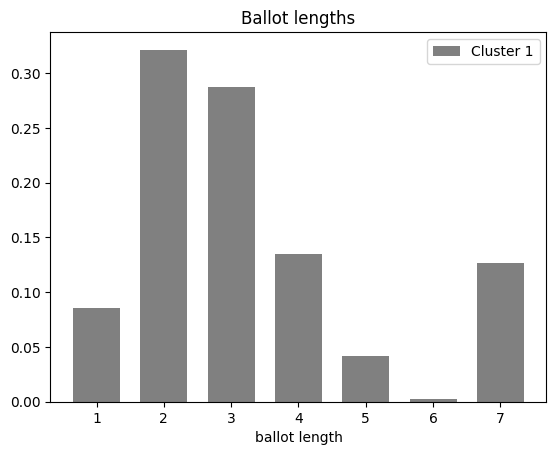

In [5]:
Plot_ballot_lengths(election)

Next let's use an MDS plot to visualize the ballots, colored by the party of the first place vote.  We'll only include ballots that received at least 10 votes, and we'll only label ballots that received at least 400 votes.

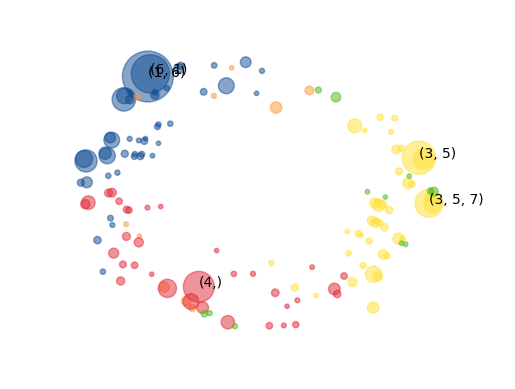

In [3]:
Ballot_MDS_plot(election, party_names=parties, label_threshold=400)

You can choose the dimension of the MDS plot to be 1,2 or 3.

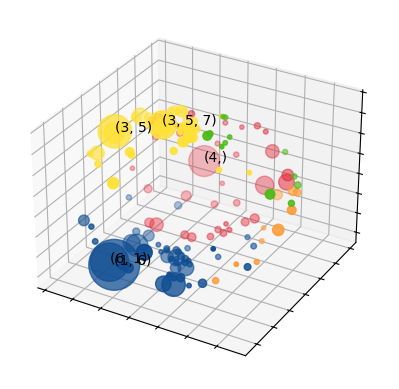

In [4]:
Ballot_MDS_plot(election, dimension=3,party_names=parties, label_threshold=400)

We can also create an MDS plot for the candidates of this election.  The markers are colored by party and sized by number of first place votes.

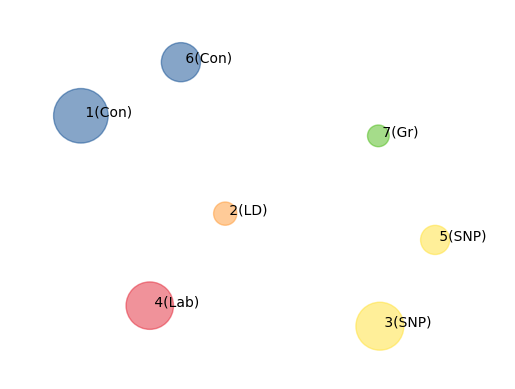

In [5]:
Candidate_MDS_plot(election, dimension = 2, party_names=parties, party_colors='Auto', method='borda_completion')

Let's use aglomerative clustering to group these candidates.

In [8]:
Group_candidates(election, method='borda_completion')

[{1}, {2}, {3}, {4}, {5}, {6}, {7}]
[{1, 6}, {2}, {3}, {4}, {5}, {7}]
[{1, 6}, {2}, {3, 5}, {4}, {7}]
[{1, 6}, {2, 7}, {3, 5}, {4}]
[{1, 6}, {2, 4, 7}, {3, 5}]
[{1, 6}, {2, 3, 4, 5, 7}]
[{1, 2, 3, 4, 5, 6, 7}]


Now, we'll build a clustering of the ballots of the election with $k=2$ clusters.  We'll use the method that applies the k-means algorithm to the head-to-head proxies of the ballots.

In [3]:
C = kmeans(election, k=2, proxy='HH')

A clustering of an election roughly means a partition its ballots.  Each cluster (each piece of the partition) is itself an election, so the clustering `C` is represented as a list of elections.

In [10]:
print(len(C))

type(C[0])

2


dict

The functions `Plot_ballot_lengths` and `Summarize_election`, which were demonstrated above using the full election, can also be given a clustering.

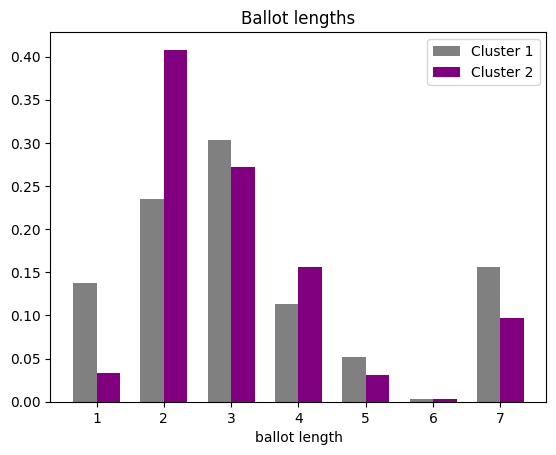

This election has: 7 candidates, 11315 ballots, 1238 distinct ballots, 3.24 avg ballot length.
 CLUSTER 1: 5670 ballots, 716 distinct ballots, 3.34 avg ballot length. 
 CLUSTER 2: 5645 ballots, 522 distinct ballots, 3.14 avg ballot length. 
Top ballots:
 	 1342 votes for (1, 6). 
 	 759 votes for (6, 1). 
 	 578 votes for (3, 5). 
 	 494 votes for (4,). 
 	 403 votes for (3, 5, 7). 
 	 285 votes for (1, 6, 2). 
 	 254 votes for (1, 6, 4). 
 	 219 votes for (5, 3). 
 	 173 votes for (4, 2). 
 	 152 votes for (6, 1, 4). 
 	 144 votes for (5, 3, 7). 


In [11]:
Plot_ballot_lengths(C)
Summarize_election(election, C)

Next let's visualize this clustering via a Borda plot, a mentions plot.  We'll also create a ballot MDS plot like above, except with ballots colored by cluster assignment.

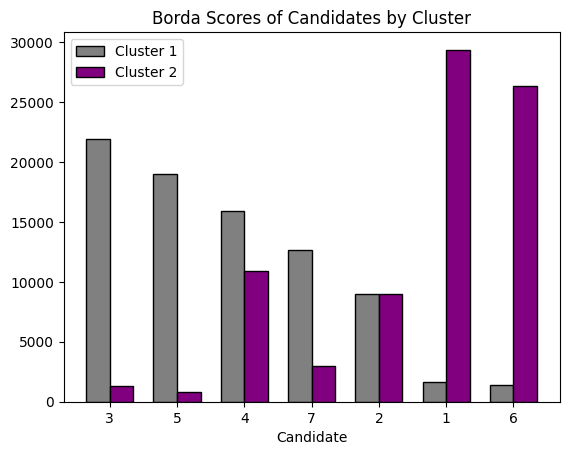

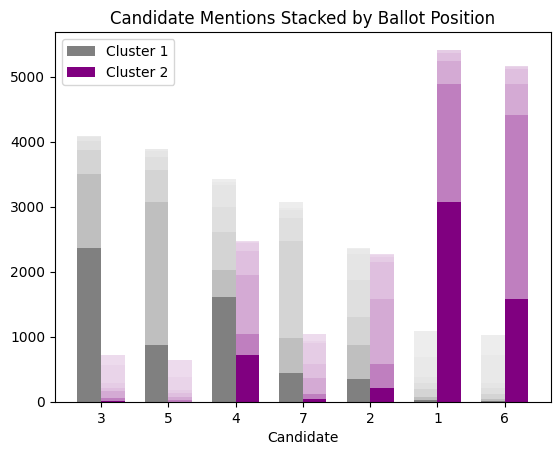

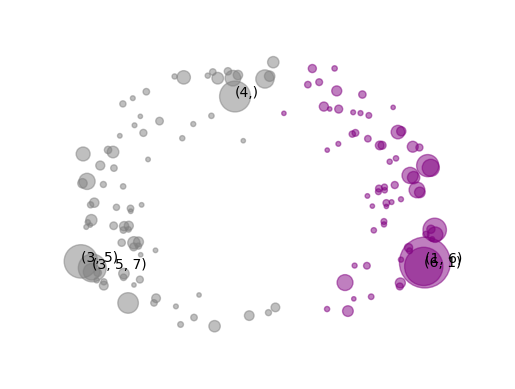

In [14]:
Plot_clusters(C, method = 'Borda', filename='plots/PH_Borda_bars.jpg')
Plot_clusters(C, method = 'Mentions', filename = 'plots/PH_Mentions_bars.jpg')
Ballot_MDS_plot(election, C, label_threshold=400)

We can create several MDS ballot plots that all use the same projection by using the `return_data=True` option.  Here we'll color the same plot in three ways: by party, by 3-means assigments, and by modularity clustering assignment.

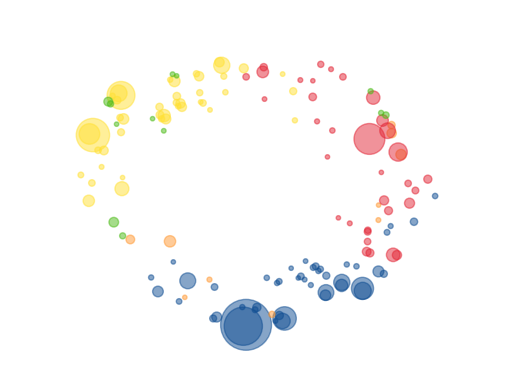

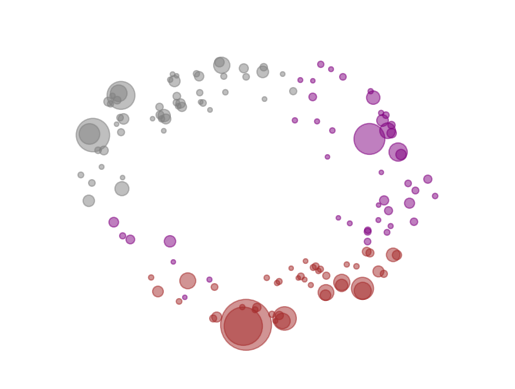

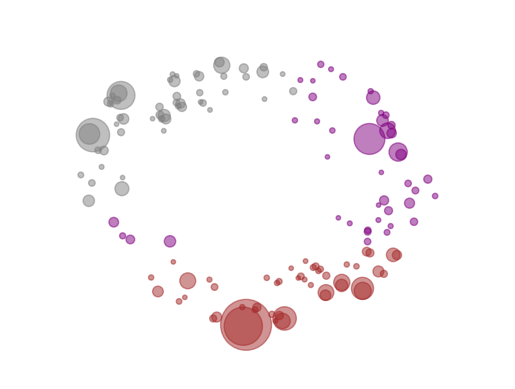

Modularity = 0.2273642004155207.  Closeness = 0.021034025629695096.


In [8]:
# Compute the two clusterings
C_mod, modularity = Modularity_cluster(election, num_cands=num_cands, return_modularity = True)
C_3means = kmeans(election, k=3)
# Measure their closeness and the matching (permutation) that achieves it
dif, perm = Clustering_closeness(election, C_mod, C_3means, return_perm=True)
# re-order the pieces of one of the clusterings to best match with the pieces of the other
C_3means_ordered = [C_3means[n] for n in perm]
# Display all three with a common projection
projections, error = Ballot_MDS_plot(election, party_names=parties, return_data=True) #colored by party of first place vote
Ballot_MDS_plot(election, C_mod, projections=projections) #colored by 3-means assignment
Ballot_MDS_plot(election, C_3means_ordered,projections=projections) # colored by modularity assignment
print(f"Modularity = {modularity}.  Closeness = {dif}.")

Let's try applying the k-medoids algorithm to the Borda proxies of the ballots, and see if the resulting clustering is any different. 

In [13]:
C2 = kmedoids(election, k=2, proxy = 'Borda')

Clustering_closeness(election, C, C2)

0.07794962439239947

This means that there's a 7.8% difference between the k-means clustering and the k-medoid clustering; that is, about 7.8% of the ballots would need to be moved to turn one clustering into the other.

Let's check that, if the clusterings are random, then their closeness would be much larger.

In [14]:
R1 = Random_clusters(election, k=2) # for each ballot, the full weight is put into a random one of the clusters.
R2 = Random_clusters(election, k=2)

Clustering_closeness(election, R1,R2)


0.37711003093239065

Next we'll perform slate clustering.  The `Slate_cluster` function simultaneously determines the slates (bipartition of the candidates) and the corresponding clustering of the ballots.  With the default verbose setting, the slate is printed. 

Here the slate (the optimal bipartition of the candidates) is: {1,6}, {2,3,4,5,7}.

In [5]:
Cs = Slate_cluster(election, verbose=True)

Clustering_closeness(election, C,Cs)

Slate = (1, 6).
Portion of ballots that tied = 0.005567830313742819
Portion of ballots that are strongly consistent = 0.4269553689792311


0.027087936367653557

For comparison, we'll illustrate the ballot MDS plots of elections that are randomly generated via a Mallows model using 1 and 2 centers.

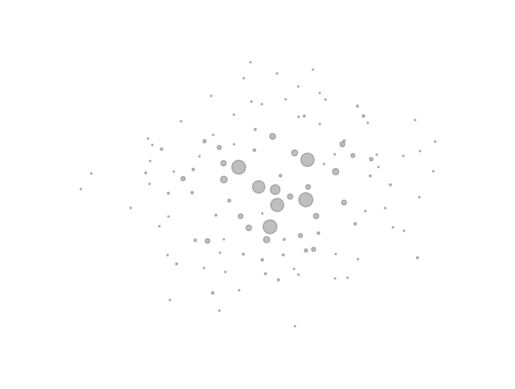

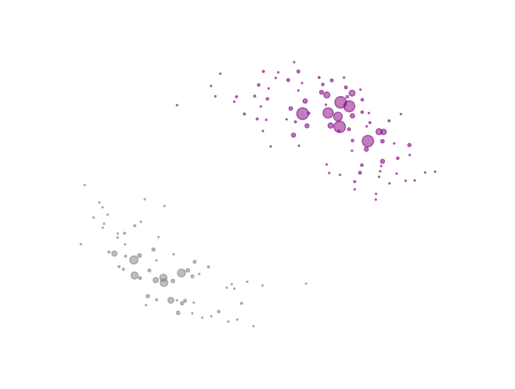

In [2]:
E1,C1 = Mallows_election(num_cands=7, num_clusters=1, centers=[[1,2,3,4,5,6,7]], sizes=[1000], p=.5)
E2,C2 = Mallows_election(num_cands=7, num_clusters=2, centers=[[1,2,3,4,5,6,7], [7,5,6,3,2,1,4]], 
                         sizes=[300, 700], p=.5)
Ballot_MDS_plot(E1,C1, threshold = 1)
Ballot_MDS_plot(E2,C2, threshold = 1)